**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [ ]:
# To read data from diamonds.csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?', header=None,  names = headers)
data = data.reset_index(drop=True)
data = data.iloc[1:]
# data.head(10)
data = data.astype({'carat':'float32','cut':'category','color':'category','clarity':'category','depth':'float32','table':'float32','price':'float32','x':'float32','y':'float32','z':'float32'})
scaler = MinMaxScaler()
le = LabelEncoder()
data[['cut','color','clarity']] = data[['cut','color','clarity']].apply(lambda col: le.fit_transform(col))
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float32
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float32
 5   table    53940 non-null  float32
 6   price    53940 non-null  float32
 7   x        53940 non-null  float32
 8   y        53940 non-null  float32
 9   z        53940 non-null  float32
dtypes: float32(7), int64(3)
memory usage: 2.7 MB




```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [ ]:
#Splitting the dataset
X = data[['cut','color','clarity','carat','depth','table','x']]
y = data['price']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=1)

In [ ]:
class knn:
  def __init__(self):
    pass
  def knn_euc(self,X_train,X_test):
    distances = []
    for x in X_test:
      distance = X_train-x[np.newaxis,:]
      distance = abs(distance)
      distances.append((np.sum(distance**2,axis=1)))
    self.distances = np.array(distances)
    self.indices = np.argsort(self.distances, 1)
  def knn_man(self,X_train,X_test):
    distances = []
    for x in X_test:
      distance = X_train-x[np.newaxis,:]
      distance = abs(distance)
      distances.append((np.sum(distance,axis=1)))
    self.distances = np.array(distances)
    self.indices = np.argsort(self.distances, 1)

  def knn_prediction(self,y_train,k):
    return np.mean(y_train[self.indices[:,0:k]],axis=1)

1. b) Do we need to normalise data? [If so Does it make any difference?].


In [ ]:
#NORMALISED DATASET
xtrain = scaler.fit_transform(X_train)
ytrain = y_train.to_numpy()
xtest = scaler.fit_transform(X_test)
ytest = y_test.to_numpy()
ytest.shape
k = knn()
k.knn_euc(xtrain,xtest)
r2ListNormalised = []
for num in range(1,25):
  ypredict = k.knn_prediction(ytrain,num)
  r2ListNormalised.append(r2_score(ytest,ypredict))

In [ ]:
#WITHOUT NORMALISATION
xtrain = X_train.to_numpy()
ytrain = y_train.to_numpy()
xtest = X_test.to_numpy()
ytest = y_test.to_numpy()
k = knn()
k.knn_euc(xtrain,xtest)
r2List = []
for num in range(1,25):
  ypredict = k.knn_prediction(ytrain,num)
  r2List.append(r2_score(ytest,ypredict))

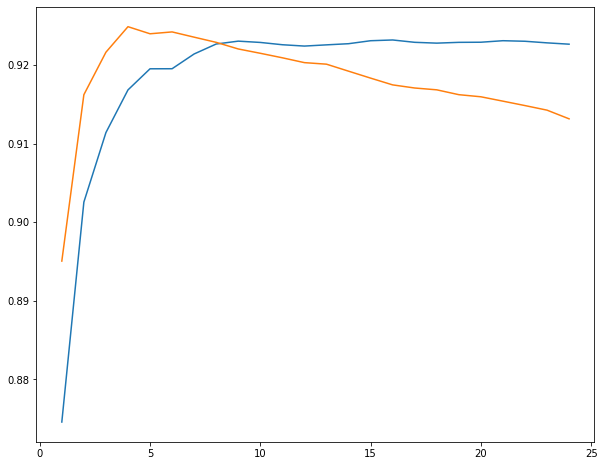

16
0.9231645567758152
4
0.924854426800331


In [ ]:
plt.figure()
plt.plot(range(1,25),r2ListNormalised,label='With Normalisation')
plt.plot(range(1,25),r2List, label='Without Normalisation')
plt.show()
print(np.argmax(r2ListNormalised)+1)
print(np.amax(r2ListNormalised))
print(np.argmax(r2List)+1)
print(np.amax(r2List))

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [ ]:
#Manhattan Distance
xtrain = scaler.fit_transform(X_train)
ytrain = y_train.to_numpy()
xtest = scaler.fit_transform(X_test)
ytest = y_test.to_numpy()
k = knn()
k.knn_man(xtrain,xtest)
r2List_man = []
for num in range(1,40):
  ypredict = k.knn_prediction(ytrain,num)
  r2List_man.append(r2_score(ytest,ypredict))

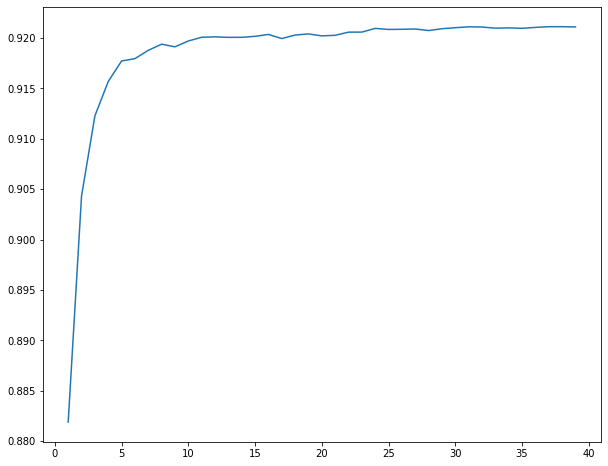

In [ ]:
plt.figure()
plt.plot(range(1,40),r2List_man,label='With Normalisation Manhattan')
plt.show()

3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [ ]:
xtrain = X_train.to_numpy()
ytrain = y_train.to_numpy()
xtest = X_test.to_numpy()
ytest = y_test.to_numpy()
k = knn()
k.knn_euc(xtrain,xtest)
ypredict_knn = k.knn_prediction(ytrain,4)

df = pd.DataFrame([
                   ['R2_score','mean_squared_error','mean_absolute_error'],
                   [r2_score(ytest,ypredict_knn),mean_squared_error(ytest,ypredict_knn),mean_absolute_error(ytest,ypredict_knn)]
                   ])
df

,0,1,2
0,R2_score,mean_squared_error,mean_absolute_error
1,0.924854,1.16765e+06,591.91


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

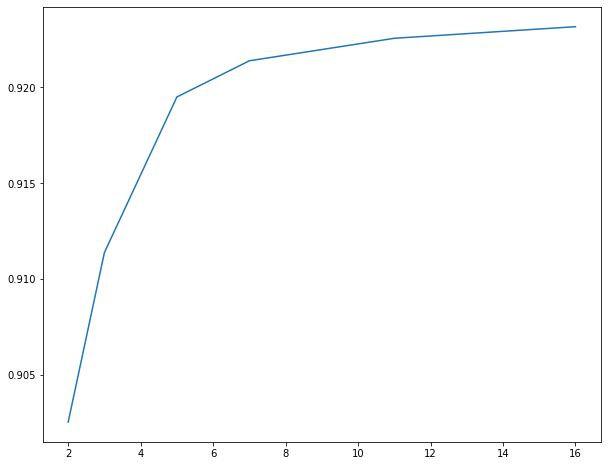

In [ ]:
xtrain = scaler.fit_transform(X_train)
ytrain = y_train.to_numpy()
xtest = scaler.fit_transform(X_test)
ytest = y_test.to_numpy()
kList = [2,3,5,7,11,16]
k = knn()
k.knn_euc(xtrain,xtest)
r2List = []
for num in kList:
  ypredict=k.knn_prediction(ytrain,num)
  r2List.append(r2_score(ytest,ypredict))
plt.plot(kList,r2List)

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

In [ ]:
#The R2-squared are not same as depicted by the graph above because for different values of k we are taking mean of different number of neigbhours.
#For different values of K the ypredicted is different and in turn the r2_score is different.
#We can compute r2_score for different value of K using the same distance which depicts how well our model has performed and then accordingly we can choose our K wrt to best r2_score possible.

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(X_train, y_train)
print(num,r2_score(ytest,neigh.predict(X_test)))

29 0.9248531227406983


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [ ]:
#                                  r2_score            K
#Scikit-learn                       0.9248            K=4
#Normalised Euclidean               0.92316           K=16
#Without Normalised Euclidean       0.92485           K=4

#All the values are calculated above

6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


In [ ]:
# report this  along with the experiments
# Advantages
# Knn regression algorithm can learn non-linear decision boundry
# Single hyper-parameter K which can easily be configured
# No time complexity for training part of the algorithm all the calculation are done in prediction phase
# Disadvantages
# Higher Prediction Time if the dataset is large as we have to compute distances for every sample in test dataset with every Training Sample.
# Higher Prediction Time for dataset with High Dimension.
# Data needs to be pre-processed before any training and prediction can be done. 

# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [ ]:
X = data[['carat','cut','color','clarity','depth','x']]
y = data['price']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=1)

In [ ]:
class LinearRegression:
  def __init__(self):
    pass
  def train(self,X_train,y_train):
    self.y = y_train
    self.X = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
    self.m,self.n=self.X.shape
    self.theta = np.ones((self.n,1))
    self.h = np.dot(self.X,self.theta)
  
  def compute(self,alpha,iter):
    self.cost = np.ones(iter)
    self.w = np.ones((iter,self.n))
    for i in range(iter):
      self.theta = self.theta - ( alpha/self.m ) * self.X.T@(self.h-self.y)
      self.h = self.X@self.theta
      self.cost[i] = 1/(2*self.m)*np.sum(np.square(self.h-self.y))
      self.w[i] = self.theta.T
    return self.cost
  def predict(self,X_test):
    self.X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
    indices = np.argsort(self.cost)
    return np.dot(self.X_test,self.w[indices[0]].T)


0.8168483293358948


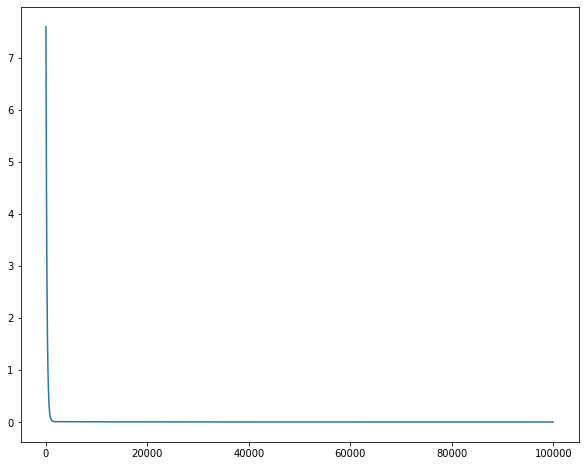

In [ ]:
xtrain = scaler.fit_transform(X_train)
xtest = scaler.fit_transform(X_test)
ytrain = y_train.to_numpy()
ytrain = ytrain.reshape(-1,1)
ytrain = scaler.fit_transform(ytrain)
ytest = y_test.to_numpy()
ytest = ytest.reshape(-1,1)
ytest = scaler.fit_transform(ytest)

l = LinearRegression()
l.train(xtrain,ytrain)
cost = l.compute(0.001,100000)
y_predicted_linear = l.predict(xtest)
print(r2_score(ytest,y_predicted_linear))

plt.figure()
plt.plot(range(100000),cost)

2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

In [ ]:
#code for Correlation between features and the Diamond Price.
data.corr()
# When the Correlation value is near zero, there is no linear relationship. 
# As the correlation gets closer to plus or minus one, the relationship is stronger. 
# A value of 1 or -1 indicates a perfect linear relationship between two variables.
# therefore features such as carat,x,y,z are suitable for linear regression

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.022342,0.270287,-0.225721,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.027572,0.263584,-0.217616,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.002037,0.268227,-0.224263,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [ ]:
# import sklearn model
from sklearn.linear_model import LinearRegression
sklearn_regressor = LinearRegression().fit(xtrain, ytrain)
ypredicted = sklearn_regressor.predict(xtest)
r2_score(ytest,ypredicted)

0.8304982530234089

2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [ ]:
#Adding Extra Features improved the accuracy which can be seen below

X = data[['carat','cut','color','clarity','depth','x','y','z']]
y = data['price']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=1)
from sklearn.linear_model import LinearRegression
sklearn_regressor = LinearRegression().fit(X_train, y_train)
ypredicted = sklearn_regressor.predict(X_test)
r2_score(y_test,ypredicted)


0.8853866599649804

2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


Explanation - 

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


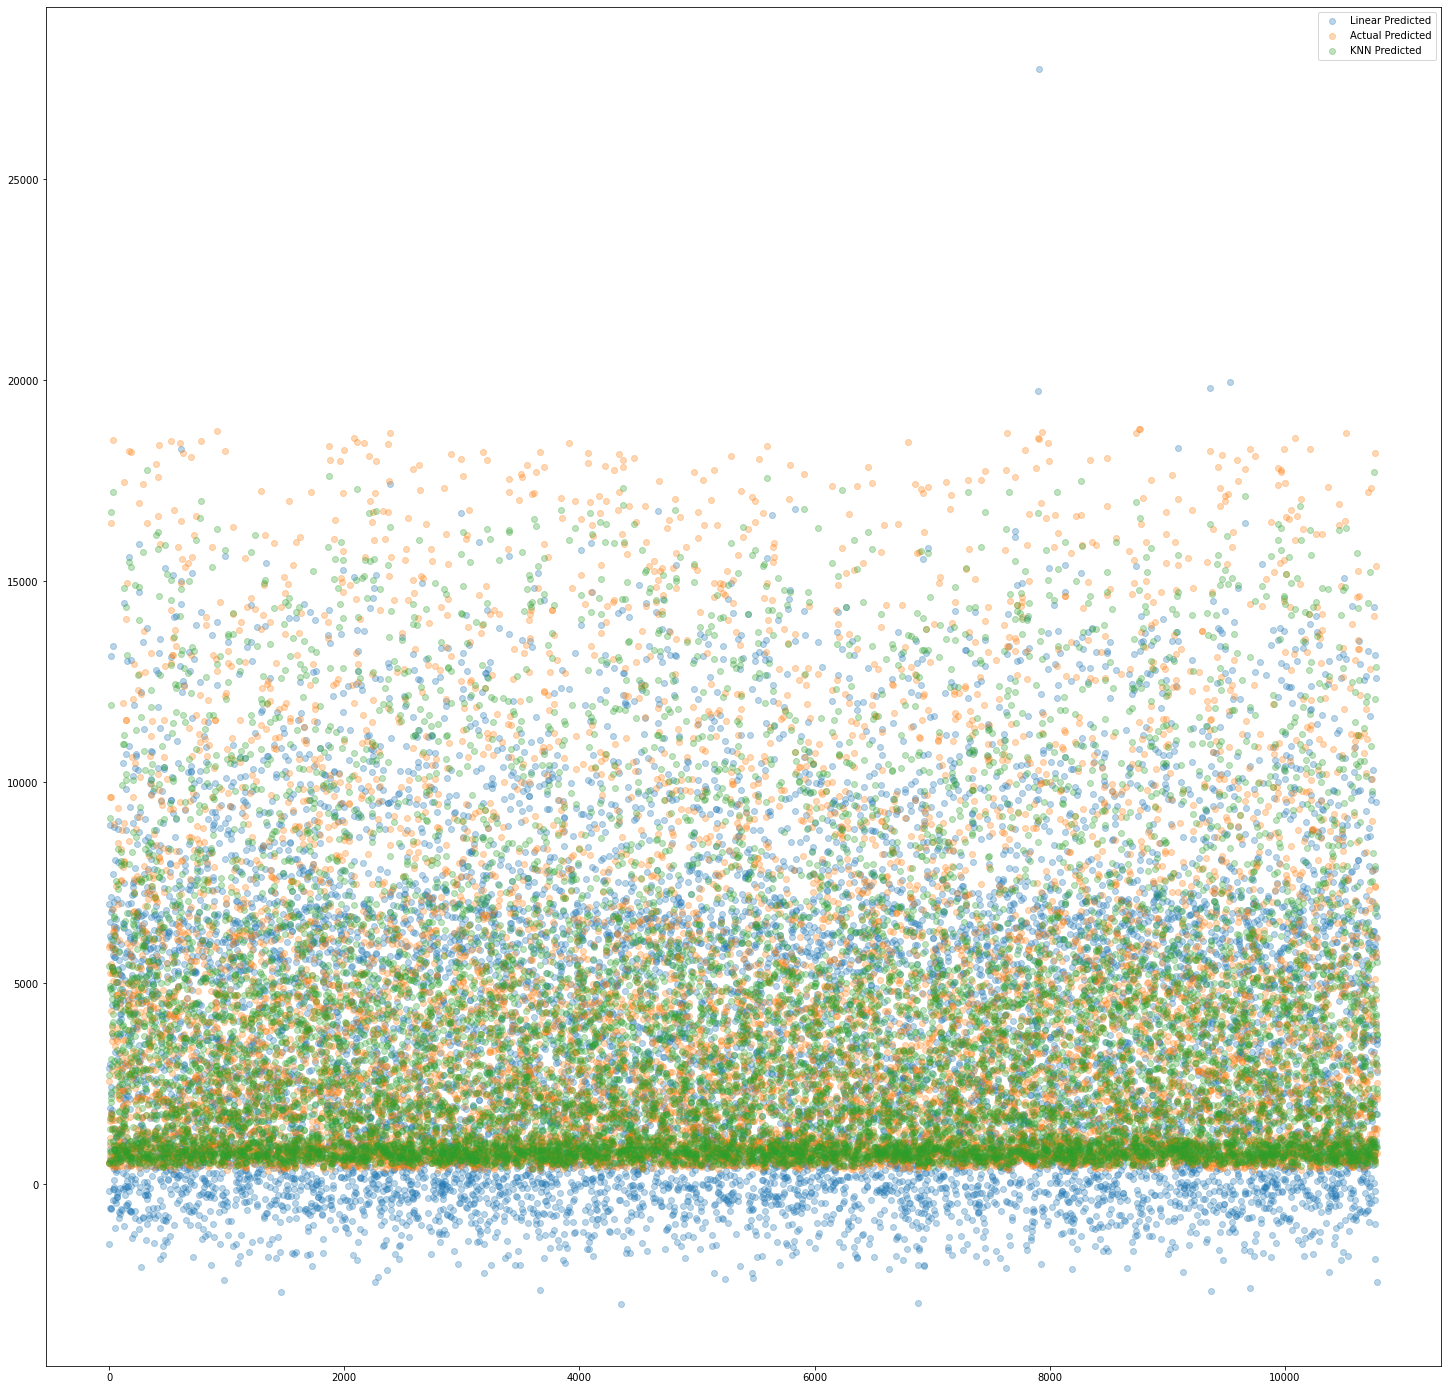

In [ ]:
plt.figure(figsize=(25,25))
y_predicted_l = y_predicted_linear.reshape(1,-1)
y_predicted_l = scaler.inverse_transform(y_predicted_l)
plt.scatter(range(y_predicted_l.shape[1]),y_predicted_l,alpha=0.3,label='Linear Predicted')
plt.scatter(range(len(y_test)),y_test,alpha=0.3,label='Actual Predicted')
plt.scatter(range(len(ypredict_knn)),ypredict_knn,alpha=0.3,label='KNN Predicted')
plt.legend()
plt.show()

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [ ]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os
import time


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [ ]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-09 06:01:46--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  51.8MB/s    in 3.3s    

2021-02-09 06:01:49 (49.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

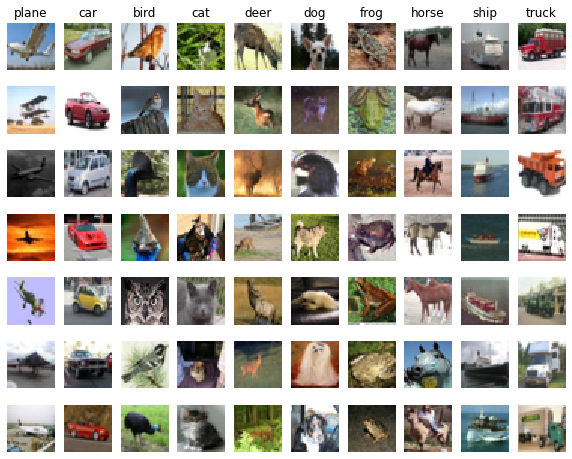

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [ ]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [ ]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass
    
    def train(self,X_train,y_train):
      self.X_train = X_train
      self.y_train = y_train
    
    def compute_distances_two_loops(self,X_test):
      distances = np.zeros(shape=(500,5000))
      i=0
      for i in range(500):
        for j in range(5000):
          distances[i][j] = np.sum((X_test[i] - X_train[j])**2)
      return distances
    
    def compute_distances_one_loops(self,X_test):
      distances = np.zeros(shape=(500,5000))
      i=0
      for x in X_test:
        distance = X_train - x[np.newaxis,:]
        distances[i] = np.sum(distance**2,axis=1)
        i=i+1
      return distances
    
    def compute_distances_no_loops(self,X_test):
      distances = -2 * X_test@self.X_train.T + np.sum(self.X_train**2,axis=1) +np.sum(X_test**2,axis=1)[:,np.newaxis]
      return distances
    
    def predict_labels(self,distances,k):
      ypredict = np.ones(distances.shape[0])
      indices = np.argsort(distances,axis=1)
      # print(self.y_train[indices])
      i=0
      for x in indices[:,0:k]:
        labels = self.y_train[x]
        counts = np.bincount(labels)
        ypredict[i] = np.argmax(counts)
        i=i+1
      return ypredict

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [ ]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [ ]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.compute_distances_no_loops(X_test)
print(dists.shape)
dists

(500, 5000)


array([[14469834., 17729119., 30294615., ..., 16061239., 17667570.,
        18959080.],
       [40155461., 27775852., 16326740., ..., 23320722., 22034553.,
        60347005.],
       [27298944., 18067965., 14242667., ..., 14188899., 19936218.,
        40367876.],
       ...,
       [28803995., 25632726., 40473234., ..., 26281702., 20587147.,
        35057549.],
       [13483064., 14888853., 23492261., ..., 12397759., 10127462.,
        19790514.],
       [48454469., 37011572., 40171948., ..., 37009642., 17042427.,
        64658521.]])

Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [ ]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


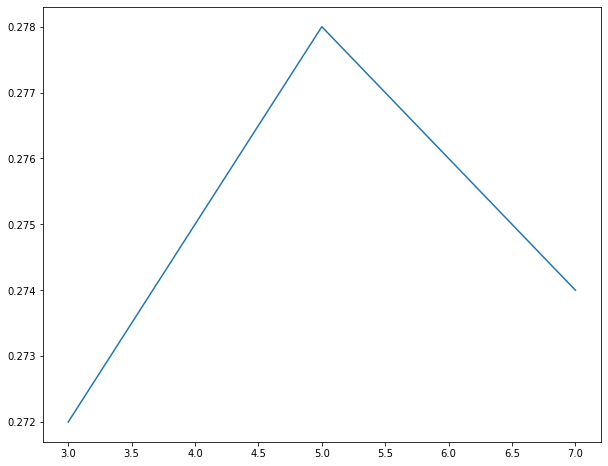

In [ ]:
# Use this cell to compute accuracies for k = 3, 5, 7
accuracies_list = []
kList = [3,5,7]
for k in kList:
  y_test_pred = classifier.predict_labels(dists, k)
  num_correct = np.sum(y_test_pred == y_test)
  accuracies_list.append(float(num_correct) / num_test)

plt.figure()
plt.plot(kList,accuracies_list)
plt.show()

Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [ ]:
#single loop
dists_one_loops = classifier.compute_distances_one_loops(X_test)
print(dists_one_loops.shape)
dists_one_loops
#no loop
dists_no_loops = classifier.compute_distances_no_loops(X_test)
print(dists_no_loops.shape)
dists_no_loops

(500, 5000)
(500, 5000)


array([[14469834., 17729119., 30294615., ..., 16061239., 17667570.,
        18959080.],
       [40155461., 27775852., 16326740., ..., 23320722., 22034553.,
        60347005.],
       [27298944., 18067965., 14242667., ..., 14188899., 19936218.,
        40367876.],
       ...,
       [28803995., 25632726., 40473234., ..., 26281702., 20587147.,
        35057549.],
       [13483064., 14888853., 23492261., ..., 12397759., 10127462.,
        19790514.],
       [48454469., 37011572., 40171948., ..., 37009642., 17042427.,
        64658521.]])

Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [ ]:
start = time.time()
classifier.compute_distances_no_loops(X_test)
stop = time.time()
no_loop_time = (stop-start)
start = time.time()
classifier.compute_distances_one_loops(X_test)
stop = time.time()
one_loop_time = (stop-start)
start = time.time()
classifier.compute_distances_two_loops(X_test)
stop = time.time()
two_loop_time = (stop-start)
df = pd.DataFrame([["No Loop Time","One Loop Time","Two Loop Time"],[no_loop_time,one_loop_time,two_loop_time]])
df

,0,1,2
0,No Loop Time,One Loop Time,Two Loop Time
1,0.548616,34.5852,33.1646


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [ ]:
X_train_new,X_validate1,y_train_new,y_validate1 = train_test_split(X_train,y_train,test_size=0.2,random_state=1)
X_train_new,X_validate2,y_train_new,y_validate2 = train_test_split(X_train_new,y_train_new,test_size=0.2,random_state=1)
X_train_new,X_validate3,y_train_new,y_validate3 = train_test_split(X_train_new,y_train_new,test_size=0.3,random_state=1)
X_validate5,X_validate4,y_validate5,y_validate4 = train_test_split(X_train_new,y_train_new,test_size=0.4,random_state=1)
Xdatasets = [X_validate1,X_validate2,X_validate3,X_validate4,X_validate5]
Ydatasets = [y_validate1,y_validate2,y_validate3,y_validate4,y_validate5]
accuracies_list = []
classifier = KNearestNeighbor()
for i in range(5):
  XdataSetList=[]
  YdataSetList=[]
  for j in range(5): 
    if j==i:
      continue
    else:
      XdataSetList.append(Xdatasets[j])
      YdataSetList.append(Ydatasets[j])
  Xtrain = np.vstack(XdataSetList)
  Ytrain = np.hstack(YdataSetList)
  Xtest = Xdatasets[i]
  Ytest = Ydatasets[i]
  classifier.train(Xtrain, Ytrain)
  dists = classifier.compute_distances_no_loops(Xtest)
  y_test_pred = classifier.predict_labels(dists, k=1)
  num_correct = np.sum(y_test_pred == Ytest)
  accuracies_list.append(float(num_correct) / num_test)
df = pd.DataFrame(accuracies_list)
df.describe()

,0
count,5.000000
mean,0.538400
std,0.110276
min,0.438000
25%,0.458000
50%,0.516000
75%,0.566000
max,0.714000


In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




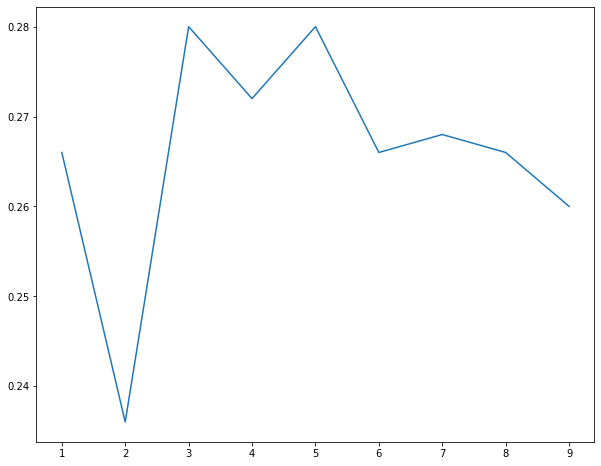

In [ ]:
#Mean across all pixels in all images
xtrain = X_train-np.mean(X_train)
xtest = X_test-np.mean(X_test)
classifier = KNearestNeighbor()
classifier.train(xtrain, y_train)
dists = classifier.compute_distances_no_loops(xtest)
accuracies_list = []
for k in range(1,10):
  y_test_pred = classifier.predict_labels(dists, k)
  num_correct = np.sum(y_test_pred == y_test)
  accuracies_list.append(float(num_correct) / num_test)
plt.figure()
plt.plot(range(1,10),accuracies_list)
plt.show()

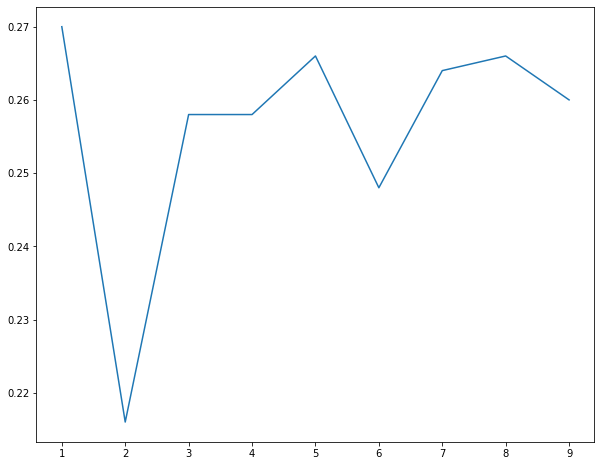

In [ ]:
#Mean across each position in all image 
xtrain = X_train - np.mean(X_train,axis=0)
xtest = X_test - np.mean(X_test,axis=0)
classifier = KNearestNeighbor()
classifier.train(xtrain, y_train)
dists = classifier.compute_distances_no_loops(xtest)
accuracies_list = []
for k in range(1,10):
  y_test_pred = classifier.predict_labels(dists, k)
  num_correct = np.sum(y_test_pred == y_test)
  accuracies_list.append(float(num_correct) / num_test)
plt.figure()
plt.plot(range(1,10),accuracies_list)
plt.show()

In [ ]:
# Time Complexity 
# knn training time complexity is O(1) as all the computation is done in the prediction method
# knn testing time complexity is O(k*n*d), where n is the number of training examples and d is the number of dimensions in the training set.
# knn is a non-linear classifier.The decision boundaries of kNN are locally linear segments, but in general have a complex shape that is not equivalent to a line in 2D or a hyperplane in higher dimensions.

# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?', header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CT         699 non-null    int64  
 1   UCSize     699 non-null    int64  
 2   UCShape    699 non-null    int64  
 3   MA         699 non-null    int64  
 4   SECSize    699 non-null    int64  
 5   BN         699 non-null    float64
 6   BC         699 non-null    int64  
 7   NN         699 non-null    int64  
 8   Mitoses    699 non-null    int64  
 9   Diagnosis  699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [ ]:
#Data splitting
X = data[[x for x in data.columns if x is not 'Diagnosis']]
y = data[['Diagnosis']]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2  ,random_state=1)
xtrain = X_train.to_numpy()
ytrain = y_train.to_numpy()
xtest = X_test.to_numpy()
ytest = y_test.to_numpy()
ytrain = ytrain[:,0]
ytest = ytest[:,0]
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(559, 9)
(140, 9)
(559,)
(140,)


In [ ]:
class_label = {
        2:"benign",
        4:"malignant",
    }



def misclassification(y):
  counts = np.bincount(y)
  prob = counts/len(y)
  return 1-np.amax(prob)

def gini(y):
  counts = np.bincount(y)
  prob = counts/len(y)
  return 1-np.sum([p**2 for p in prob if p > 0])

def entropy(y):
    counts = np.bincount(y)
    prob = counts / len(y)
    return -np.sum([p * np.log2(p) for p in prob if p > 0])

class Node:
  def __init__(self,col=None,val=None,left=None,right=None,*,clas=None):
    
    self.left =left
    self.right =right
    self.col = col
    self.val = val
    self.clas = clas

class DecisionTree:
  def __init__(self,maxDepth=100,cols=None,criteria='gini',minrows=2):
    self.root = None
    self.maxDepth=maxDepth
    self.cols = cols
    self.criteria = criteria
    self.minrows=minrows
  
  def fit(self,X,y):
    if self.cols is None:
      self.cols=[x for x in range(X.shape[1])]
    self.root = self.build(X,y)
    
  def build(self,X,y,depth=0):
    rows , columns = X.shape
    labels = len(np.unique(y))
    if depth>=self.maxDepth or labels ==1 or rows < self.minrows:
      return Node(clas=np.argmax(np.bincount(y)))
    
    split_col, split_value = self.split(X,y)

    if split_col==None and split_value==None:
      return Node(clas=np.argmax(np.bincount(y)))
    
    left_indices = np.argwhere(X[:,split_col] <= split_value).flatten()
    right_indices = np.argwhere(X[:,split_col] > split_value).flatten()
    
    # print(split_col,split_value,len(left_idxs),len(right_idxs))
    
    left = self.build(X[left_indices, :], y[left_indices], depth+1)
    right = self.build(X[right_indices, :], y[right_indices], depth+1)

    return Node(split_col, split_value, left, right)
    

  def split(self,X,y):
    best_gain = 0
    split_col, split_value = None, None
    for col in self.cols:
      X_column = X[:, col]
      values = np.unique(X_column)
      for value in values:
        if self.criteria=='gini':
          gain = self.information_gain_gini(y, X_column, value)
        elif self.criteria=='misclassification':
          gain = self.information_gain_misclass(y,X_column,value)
        else:
          gain = self.information_gain_entropy(y,X_column,value)
        if gain > best_gain:
          best_gain = gain
          split_col = col
          split_value = value
    return split_col, split_value

  def information_gain_entropy(self,y,X_column,split_thresh):
    parent = entropy(y)
    left_indices = np.argwhere(X_column <= split_thresh).flatten()
    right_indices = np.argwhere(X_column > split_thresh).flatten()
    if len(left_indices) == 0 or len(right_indices) == 0:
      return 0
    n = len(y)
    child_entropy = (len(left_indices) / n) * entropy(y[left_indices]) + (len(right_indices)/ n) * entropy(y[right_indices])

    g = parent - child_entropy
    return g


  def information_gain_gini(self,y,X_column,split_thresh):
    parent = gini(y)
    left_indices = np.argwhere(X_column <= split_thresh).flatten()
    right_indices = np.argwhere(X_column > split_thresh).flatten()
    if len(left_indices) == 0 or len(right_indices) == 0:
      return 0

    n = len(y)

    child_gini = (len(left_indices) / n) * gini(y[left_indices]) + (len(right_indices)/ n) *  gini(y[right_indices])                                                                                         
    g = parent - child_gini
    return g


  def information_gain_misclass(self,y,X_column,split_thresh):
    parent = misclassification(y)
    left_indices = np.argwhere(X_column <= split_thresh).flatten()
    right_indices = np.argwhere(X_column > split_thresh).flatten()
    if len(left_indices) == 0 or len(right_indices) == 0:
      return 0

    n = len(y)
    child_gini = (len(left_indices) / n) * misclassification(y[left_indices]) + (len(right_indices) / n) * misclassification(y[right_indices])

    g = parent - child_gini
    return g

  def traverse_tree(self,root,x):
    if root.left==None and root.right==None:
      return root.clas
    if x[root.col] <= root.val:
      if root.left:
        return self.traverse_tree(root.left,x)
    else:
      if root.right:
        return self.traverse_tree(root.right,x)

  def predict(self,X):
    ypredict = np.ones(X.shape[0])
    i=0
    for x in X:
      ypredict[i] = self.traverse_tree(self.root,x)
      i=i+1
    return ypredict

  def print_dfs(self):
    self.dfs(self.root,0)

  def dfs(self,root,spacing):


    if root.left==None and root.right==None:
      print("".ljust(spacing)+class_label[root.clas])
      return
    
    print("".ljust(spacing)+f'Is {data.columns[root.col]} <= {root.val} ?')
    print("".ljust(spacing)+'True Branch')
    if root.left:
      self.dfs(root.left,spacing+1)

    
    print("".ljust(spacing)+f'Is {data.columns[root.col]} <= {root.val} ?')
    print("".ljust(spacing)+'False Branch')
    if root.right:
      self.dfs(root.right,spacing+1)
    return



In [ ]:
d = DecisionTree()
d.fit(xtrain,ytrain)

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [ ]:
de = DecisionTree(criteria="entropy")
de.fit(xtrain,ytrain)
dg = DecisionTree(criteria="gini")
dg.fit(xtrain,ytrain)
dm = DecisionTree(criteria="misclassification")
dm.fit(xtrain,ytrain)

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [ ]:
ypredicte = de.predict(xtest)
ypredictg = dg.predict(xtest)
ypredictm = dm.predict(xtest)
df = pd.DataFrame([["Entropy R2 Score","Gini R2 Score","Misclassfication R2 Score"],[r2_score(ytest,ypredicte),r2_score(ytest,ypredictg),r2_score(ytest,ypredictm)]])
df

,0,1,2
0,Entropy R2 Score,Gini R2 Score,Misclassfication R2 Score
1,0.714674,0.714674,0.77808


1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

In [ ]:
#Reducing the depth decreases the r2_score which indicates our model losses accuracy 
d_test = DecisionTree(maxDepth=4)
d_test.fit(xtrain,ytrain)
ypredictt = d_test.predict(xtest)
r2_score(ytest,ypredictt)

0.6829710144927535

In [ ]:
#Increasing the min samples in the leaf 
d_test = DecisionTree(minrows=5)
d_test.fit(xtrain,ytrain)
ypredictt = d_test.predict(xtest)
r2_score(ytest,ypredictt)

0.6512681159420289

1. e) Does standardisation and normalisation help in this case? Report

Answer: Standardisation and normalisation won't effect the Decision Tree method because decision tree are not affected by the magnitude of the feature scale. They work on either the sample is greater than the theshold or less than the threshold value.

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(xtrain,ytrain)
ypredicted = tree.predict(xtest)
r2_score(ytest,ypredicted)

0.6829710144927535

3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

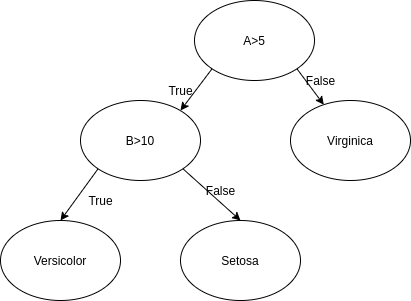
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [ ]:
d.print_dfs()

Is UCSize <= 2.0 ?
True Branch
 Is BN <= 5.0 ?
 True Branch
  Is NN <= 6.0 ?
  True Branch
   Is CT <= 7.0 ?
   True Branch
    Is BN <= 4.0 ?
    True Branch
     benign
    Is BN <= 4.0 ?
    False Branch
     Is SECSize <= 1.0 ?
     True Branch
      malignant
     Is SECSize <= 1.0 ?
     False Branch
      benign
   Is CT <= 7.0 ?
   False Branch
    Is UCShape <= 1.0 ?
    True Branch
     benign
    Is UCShape <= 1.0 ?
    False Branch
     malignant
  Is NN <= 6.0 ?
  False Branch
   malignant
 Is BN <= 5.0 ?
 False Branch
  Is CT <= 1.0 ?
  True Branch
   benign
  Is CT <= 1.0 ?
  False Branch
   malignant
Is UCSize <= 2.0 ?
False Branch
 Is BN <= 2.0 ?
 True Branch
  Is UCSize <= 6.0 ?
  True Branch
   Is SECSize <= 3.0 ?
   True Branch
    benign
   Is SECSize <= 3.0 ?
   False Branch
    Is BN <= 0.0 ?
    True Branch
     benign
    Is BN <= 0.0 ?
    False Branch
     Is MA <= 1.0 ?
     True Branch
      Is CT <= 5.0 ?
      True Branch
       benign
      Is CT <= 5.0 

4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

In [ ]:
#Experimenting with various features we get highest accuracies column number [0,1,2,3]
#Using Columns 0,1,2,3 we get the highest r2_score of 87.3% 
dtest = DecisionTree(cols=[0,1,2,3])
dtest.fit(xtrain,ytrain)
ypredict = dtest.predict(xtest)
r2_score(ytest,ypredict)

0.8731884057971014

5. Report the advantages and disadvantages of decision trees based on the above question.

Answer:
- Advantages
- Does not require any data preprocessing such as normalisation and scaling
- A decision tree can also be built easily with dataset containing missing value

- Disadvantages
-The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.
- Decision tree model training time is relatively more as we have to iterate over all the values of all the features.
- A small change can affect the decision tree to a large extend